In [1]:
% matplotlib inline
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Misión de medición de lluvia tropical (Tropical Rainfall Measuring Mission)

## Importación de datos

In [2]:
!ls data | head -15

3B43.19980101.7.HDF.nc
3B43.19980201.7.HDF.nc
3B43.19980301.7.HDF.nc
3B43.19980401.7.HDF.nc
3B43.19980501.7.HDF.nc
3B43.19980601.7.HDF.nc
3B43.19980701.7.HDF.nc
3B43.19980801.7.HDF.nc
3B43.19980901.7.HDF.nc
3B43.19981001.7.HDF.nc
3B43.19981101.7.HDF.nc
3B43.19981201.7.HDF.nc
3B43.19990101.7.HDF.nc
3B43.19990201.7.HDF.nc
3B43.19990301.7.HDF.nc


ls: write error


In [3]:
ds = xr.open_dataset("./data/3B43.20081201.7A.HDF.nc")

## Inspección de los datos

In [4]:
ds

<xarray.Dataset>
Dimensions:                 (nlat: 85, nlon: 63)
Coordinates:
  * nlon                    (nlon) float32 -82.375 -82.125 -81.875 -81.625 ...
  * nlat                    (nlat) float32 -20.125 -19.875 -19.625 -19.375 ...
Data variables:
    precipitation           (nlat, nlon) float32 ...
    relativeError           (nlat, nlon) float32 ...
    gaugeRelativeWeighting  (nlat, nlon) int32 ...
Attributes:
    Grid.GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatit...
    FileHeader:       AlgorithmID=3B43;\nAlgorithmVersion=3B43_7.0;\nFileName...
    FileInfo:         DataFormatVersion=m;\nTKCodeBuildVersion=1;\nMetadataVe...
    GridHeader:       BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatit...
    history:          2018-05-14 14:23:48 GMT Hyrax-1.13.4 https://disc2.gesd...

In [5]:
print(ds.attrs["Grid.GridHeader"])

BinMethod=ARITHMETIC_MEAN;
Registration=CENTER;
LatitudeResolution=0.25;
LongitudeResolution=0.25;
NorthBoundingCoordinate=50;
SouthBoundingCoordinate=-50;
EastBoundingCoordinate=180;
WestBoundingCoordinate=-180;
Origin=SOUTHWEST;



In [6]:
ds["precipitation"]

<xarray.DataArray 'precipitation' (nlat: 85, nlon: 63)>
array([[0.002339, 0.005605, 0.00625 , ..., 0.016214, 0.014935, 0.029981],
       [0.010202, 0.008548, 0.008306, ..., 0.014921, 0.03096 , 0.031759],
       [0.012903, 0.014677, 0.016492, ..., 0.028555, 0.032159, 0.037345],
       ...,
       [0.008952, 0.007863, 0.004556, ..., 0.473076, 0.481589, 0.533017],
       [0.009919, 0.009919, 0.005927, ..., 0.467437, 0.487927, 0.537525],
       [0.008185, 0.00875 , 0.008952, ..., 0.564608, 0.534674, 0.449131]],
      dtype=float32)
Coordinates:
  * nlon     (nlon) float32 -82.375 -82.125 -81.875 -81.625 -81.375 -81.125 ...
  * nlat     (nlat) float32 -20.125 -19.875 -19.625 -19.375 -19.125 -18.875 ...
Attributes:
    units:    mm/hr

In [7]:
ds.precipitation

<xarray.DataArray 'precipitation' (nlat: 85, nlon: 63)>
array([[0.002339, 0.005605, 0.00625 , ..., 0.016214, 0.014935, 0.029981],
       [0.010202, 0.008548, 0.008306, ..., 0.014921, 0.03096 , 0.031759],
       [0.012903, 0.014677, 0.016492, ..., 0.028555, 0.032159, 0.037345],
       ...,
       [0.008952, 0.007863, 0.004556, ..., 0.473076, 0.481589, 0.533017],
       [0.009919, 0.009919, 0.005927, ..., 0.467437, 0.487927, 0.537525],
       [0.008185, 0.00875 , 0.008952, ..., 0.564608, 0.534674, 0.449131]],
      dtype=float32)
Coordinates:
  * nlon     (nlon) float32 -82.375 -82.125 -81.875 -81.625 -81.375 -81.125 ...
  * nlat     (nlat) float32 -20.125 -19.875 -19.625 -19.375 -19.125 -18.875 ...
Attributes:
    units:    mm/hr

## Trazado de datos

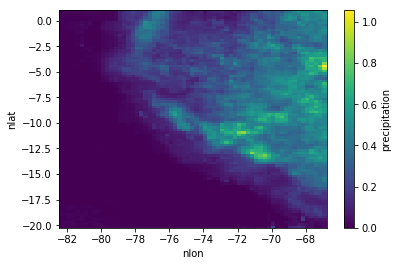

In [8]:
ds["precipitation"].plot();

## Trazado mejorado usando cartopy

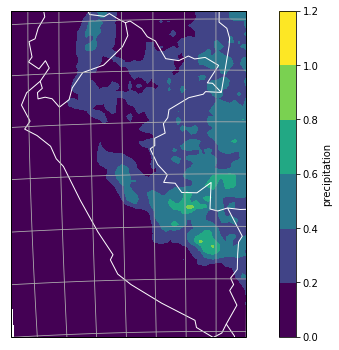

In [9]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Orthographic(-70,-15))
ds.precipitation.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.coastlines(color="white")
ax.add_feature(cartopy.feature.BORDERS, edgecolor="white")
ax.gridlines()
ax.set_extent([-82, -68.5, 0.5, -18]); #x0, x1, y0, y1

## Problema con las unidades

* los datos de precipitación se dan en mm/h $\to$ mm/mes ???

$\to$ extrae el número de días del año y del mes

### Computar mm por mes

**Encontrar el número de días por mes de interés**

In [10]:
print(ds.attrs["FileHeader"])

AlgorithmID=3B43;
AlgorithmVersion=3B43_7.0;
FileName=3B43.20081201.7A.HDF;
GenerationDateTime=2012-11-29T22:52:47.000Z;
StartGranuleDateTime=2008-12-01T00:00:00.000Z;
StopGranuleDateTime=2008-12-31T23:59:59.999Z;
GranuleNumber=;
NumberOfSwaths=0;
NumberOfGrids=1;
GranuleStart=;
TimeInterval=MONTH;
ProcessingSystem=PPS;
ProductVersion=7A;
MissingData=;



In [11]:
file_header = ds.attrs["FileHeader"]
text = file_header.split(";")[5]
text

'\nStopGranuleDateTime=2008-12-31T23:59:59.999Z'

In [12]:
import re
match = re.search(r'\d{4}-\d{2}-\d{2}', text)
match

<_sre.SRE_Match object; span=(21, 31), match='2008-12-31'>

In [13]:
from datetime import datetime
date = datetime.strptime(match.group(), '%Y-%m-%d').date()
date

datetime.date(2008, 12, 31)

In [14]:
date.day

31

In [15]:
date.month

12

In [16]:
date.year

2008

### Refactorización

In [17]:
# %load src/extract_timestep.py
def extract_timestep(ds):
    import re
    import datetime
    import numpy as np
    file_header = ds.attrs["FileHeader"]
    text = file_header.split(";")[5]
    match = re.search(r'\d{4}-\d{2}-\d{2}', text)
    date = datetime.datetime.strptime(match.group(), '%Y-%m-%d').date()
    return date

In [18]:
extract_timestep(ds)

datetime.date(2008, 12, 31)

In [19]:
extract_timestep(ds).day

31

### Solutiton para el problema con unidades

In [20]:
ds.precipitation

<xarray.DataArray 'precipitation' (nlat: 85, nlon: 63)>
array([[0.002339, 0.005605, 0.00625 , ..., 0.016214, 0.014935, 0.029981],
       [0.010202, 0.008548, 0.008306, ..., 0.014921, 0.03096 , 0.031759],
       [0.012903, 0.014677, 0.016492, ..., 0.028555, 0.032159, 0.037345],
       ...,
       [0.008952, 0.007863, 0.004556, ..., 0.473076, 0.481589, 0.533017],
       [0.009919, 0.009919, 0.005927, ..., 0.467437, 0.487927, 0.537525],
       [0.008185, 0.00875 , 0.008952, ..., 0.564608, 0.534674, 0.449131]],
      dtype=float32)
Coordinates:
  * nlon     (nlon) float32 -82.375 -82.125 -81.875 -81.625 -81.375 -81.125 ...
  * nlat     (nlat) float32 -20.125 -19.875 -19.625 -19.375 -19.125 -18.875 ...
Attributes:
    units:    mm/hr

In [21]:
def compute_mm_per_month_from_mm_per_hour(ds, days):
    return ds * 24 * days

In [22]:
prec_mm_per_month = compute_mm_per_month_from_mm_per_hour(ds.precipitation, extract_timestep(ds).day)
prec_mm_per_month

<xarray.DataArray 'precipitation' (nlat: 85, nlon: 63)>
array([[  1.74    ,   4.169999,   4.65    , ...,  12.063048,  11.111841,
         22.305653],
       [  7.589999,   6.36    ,   6.18    , ...,  11.101038,  23.033884,
         23.628817],
       [  9.599998,  10.92    ,  12.27    , ...,  21.244896,  23.926155,
         27.784542],
       ...,
       [  6.659999,   5.849999,   3.39    , ..., 351.96875 , 358.30212 ,
        396.56448 ],
       [  7.38    ,   7.38    ,   4.409999, ..., 347.77307 , 363.01736 ,
        399.91898 ],
       [  6.09    ,   6.509999,   6.659999, ..., 420.06824 , 397.79718 ,
        334.15353 ]], dtype=float32)
Coordinates:
  * nlon     (nlon) float32 -82.375 -82.125 -81.875 -81.625 -81.375 -81.125 ...
  * nlat     (nlat) float32 -20.125 -19.875 -19.625 -19.375 -19.125 -18.875 ...

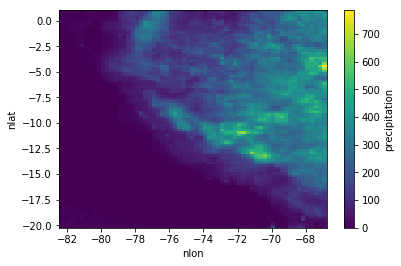

In [23]:
prec_mm_per_month.plot()

### Trazado mejorado usando cartopy

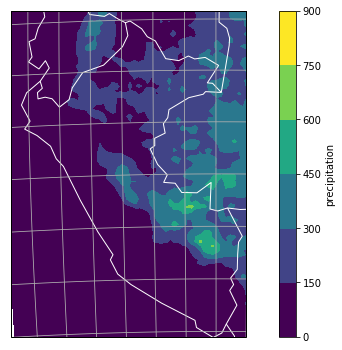

In [24]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Orthographic(-70,-15))
prec_mm_per_month.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.coastlines(color="white")
ax.add_feature(cartopy.feature.BORDERS, edgecolor="white")
ax.gridlines()
ax.set_extent([-82, -68.5, 0.5, -18]); #x0, x1, y0, y1

***

## Deberes

>* Vaya al repositorio en línea ([enlace]()) e intente reproducir el análisis.